In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

In [2]:
def bollinger_bands(data, period=20, std_factor=2):
    data["std"] = data["Adj Close"].rolling(period).std()
    data["mean"] = data["Adj Close"].rolling(period).mean()
    data["Superior Band"] = data["mean"] + data["std"] * std_factor
    data["Inferior Band"] = data["mean"] - data["std"] * std_factor

In [3]:
ticker = "PETR4.SA"
df = yf.download(ticker,
                start = "2020-01-01",
                end = "2020-12-31")
bollinger_bands(df)

[*********************100%***********************]  1 of 1 completed


In [4]:
idx_venda = df[df["Adj Close"] > df["Superior Band"]].index
df.loc[idx_venda, 'indicador'] = "Venda"
idx_compra = df[df["Adj Close"] < df["Inferior Band"]].index
df.loc[idx_compra, "indicador"] = "Compra"

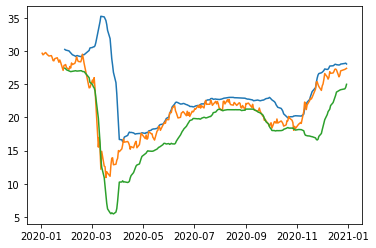

In [5]:
plt.plot(df["Superior Band"])
plt.plot(df["Adj Close"])
plt.plot(df["Inferior Band"])

In [6]:
df[df["indicador"] == "Compra"]

,Open,High,Low,Close,Adj Close,Volume,std,mean,Superior Band,Inferior Band,indicador
Date,,,,,,,,,,,
2020-02-27,25.719999,26.530001,24.889999,25.299999,24.474419,100112100,1.027938,28.065774,30.121650,26.009899,Compra
2020-02-28,25.160000,25.559999,24.620001,25.340000,24.513113,89095300,1.299706,27.898419,30.497831,25.299008,Compra
2020-03-06,24.100000,24.129999,22.549999,22.830000,22.085018,138597600,2.073998,27.150643,31.298640,23.002647,Compra
2020-03-09,17.809999,18.230000,15.410000,16.049999,15.526260,254813800,3.321630,26.553777,33.197037,19.910517,Compra
2020-03-10,18.650000,18.650000,16.370001,17.559999,16.986988,170478000,3.920490,25.991736,33.832715,18.150757,Compra
2020-03-11,16.700001,17.129999,15.000000,15.850000,15.332788,132482400,4.551839,25.359077,34.462756,16.255398,Compra
2020-03-12,13.660000,13.860000,11.080000,12.600000,12.188841,151535900,5.362547,24.559547,35.284642,13.834453,Compra
2020-08-03,22.540001,22.549999,21.719999,21.799999,21.090193,63598500,0.412893,21.952886,22.778671,21.127100,Compra
2020-09-14,21.940001,21.980000,21.430000,21.680000,20.974100,46453300,0.400979,21.795457,22.597414,20.993500,Compra
